Analysis:
-The vast majority of drivers, fares collected, and rides come from Urban areas. The second most is suburban with the least in rural areas. While the majority of fares are collected in Urban areas, suburban areas had a high percentage of total fares (30%) in relation to the total percentage of rides (26%).  There could be various reasons for this such as longer rides or higher tips given in suburban areas. 

In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Read the City and Ride Data
city_data = pd.read_csv(r"C:\Users\vjmay\city_data.csv")
ride_data=pd.read_csv(r"C:\Users\vjmay\ride_data.csv")


# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

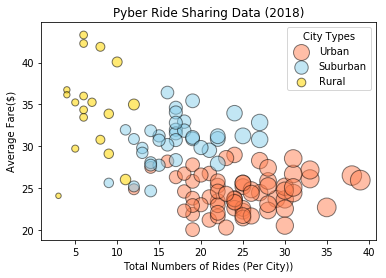

In [4]:
# Urban Data
avg_urban_fare = pyber_df[pyber_df["type"] == "Urban"].groupby("city").fare.mean()
urban_ride_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").ride_id.count()
urban_driver_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").driver_count.value_counts()

# Suburban Data
avg_suburban_fare = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").fare.mean()
suburban_ride_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").ride_id.count()
suburban_driver_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").driver_count.value_counts()

# Rural Data
avg_rural_fare = pyber_df[pyber_df["type"] == "Rural"].groupby("city").fare.mean()
rural_ride_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").ride_id.count()
rural_driver_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").driver_count.value_counts()


# Scatter plot
plt.scatter(urban_ride_total, avg_urban_fare,s=urban_driver_total*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(suburban_ride_total, avg_suburban_fare,s=suburban_driver_total*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_ride_total, avg_rural_fare,s=rural_driver_total*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Chart information

plt.title("Pyber Ride Sharing Data (2018)")

plt.xlabel("Total Numbers of Rides (Per City))")

plt.ylabel("Average Fare($)")

plt.legend(title= "City Types", loc='upper right')

# Save

plt.savefig("pyber_ridesharing_data_2018.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

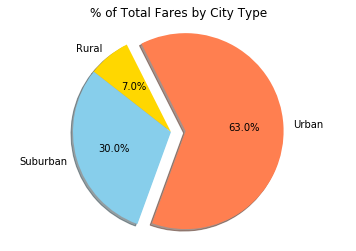

In [6]:
# Total Fares by City Type
total_fares = pyber_df["fare"].sum()
urban_fare = pyber_df.loc[pyber_df["type"] == "Urban", "fare"].sum()
rural_fare = pyber_df.loc[pyber_df["type"] == "Rural", "fare"].sum()
suburban_fare =pyber_df.loc[pyber_df["type"] == "Suburban", "fare"].sum()
urban_fare_percentage = round(urban_fare/total_fares, 2) *100
rural_fare_percentage = round(rural_fare/total_fares, 2) *100
suburban_fare_percentage = round(suburban_fare/total_fares, 2) *100

# Pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_percentage, rural_fare_percentage, suburban_fare_percentage]
explode = (0.15, 0, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["coral", "gold", "skyblue"])
ax1.axis('equal')  
plt.title("% of Total Fares by City Type")

plt.show()


## Total Rides by City Type

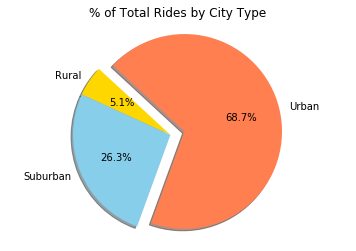

In [7]:
#Total Rides by City Type
total_rides_data = len(pyber_df)
urban_rides_totaldata = round(pyber_df.loc[pyber_df["type"] == "Urban", "ride_id"].count()/total_rides_data, 2) * 100
rural_rides_totaldata = round(pyber_df.loc[pyber_df["type"] == "Rural", "ride_id"].count()/total_rides_data, 2) * 100
suburban_rides_totaldata = round(pyber_df.loc[pyber_df["type"] == "Suburban", "ride_id"].count()/total_rides_data, 2) * 100

# Create a Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides_totaldata, rural_rides_totaldata, suburban_rides_totaldata]
explode = (0.15, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["coral", "gold", "skyblue"])
ax1.axis('equal') 
plt.title("% of Total Rides by City Type")

plt.show()


## Total Drivers by City Type

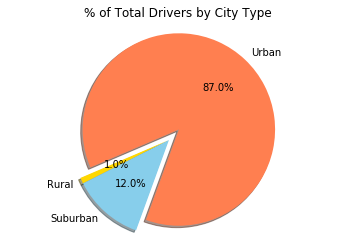

In [11]:
#Total Drivers by City Type
total_drivers_data = pyber_df["driver_count"].sum()
urban_drivers_data = round(pyber_df.loc[pyber_df["type"] == "Urban", "driver_count"].sum()/total_drivers_data, 2)* 100
rural_drivers_data = round(pyber_df.loc[pyber_df["type"] == "Rural", "driver_count"].sum()/total_drivers_data, 2)* 100
suburban_drivers_data = round(pyber_df.loc[pyber_df["type"] == "Suburban", "driver_count"].sum()/total_drivers_data, 2)* 100

#Create a Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers_data, rural_drivers_data, suburban_drivers_data]
explode = (0.15, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["coral", "gold", "skyblue"])
ax1.axis('equal') 

plt.title("% of Total Drivers by City Type")

plt.show()
